<a href="https://colab.research.google.com/github/Cyrus-White/HW-Project-Files-/blob/main/HW1Q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 311 (1.22 KB)

 Trainable params: 103 (412.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 208 (836.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1 => 1.09 (expected 1.00)
2 => 1.13 (expected 1.10)
3 => 1.17 (expected 1.17)
4 => 1.20 (expected 1.22)
5 => 1.24 (expected 1.26)
6 => 1.28 (expected 1.29)
7 => 1.31 (expected 1.32)
8 => 1.35 (expected 1.35)
9 => 1.39 (expected 1.37)
10 => 1.42 (expected 1.39)
11 => 1.43 (expected 1.41)
12 => 1.44 (expected 1.43)
13 => 1.46 (expected 1.44)
14 => 1.47 (expected 1.46)
15 => 1.48 (expected 1.47)
16 => 1.49 (expected 1.49)
17 => 1.51 (expected 1.50)
18 => 1.52 (expected 1.51)
19 => 1.53 (expected 1.52)
20 => 1.54 (expected 1.53)
21 => 1.56 (expected 1.54)
22 => 1.57 (expected 1.56)
23 => 1.58 (expected 1.57)
24 => 1.59 (expected 1.57)
25 => 1.61 (expected 1.58)
26 => 1.62 (expected 1.59)
27 => 1.63 (expected 1.60)
28 => 1.64 (expected 1.61)
29 => 1.66 (expected 1.62)
30 => 1.67 (expected 1.63)
31 => 1.68 (expected 1.63)
32 => 1.69 (expected 1.64)
33 => 1.70 (expected 1.65)
34 => 1.72 (expected 1.65)
35 => 1.72 (expected 1.66)
36 => 1.73 (expected 1.67)

<ipython-input-5-f92357086504>:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


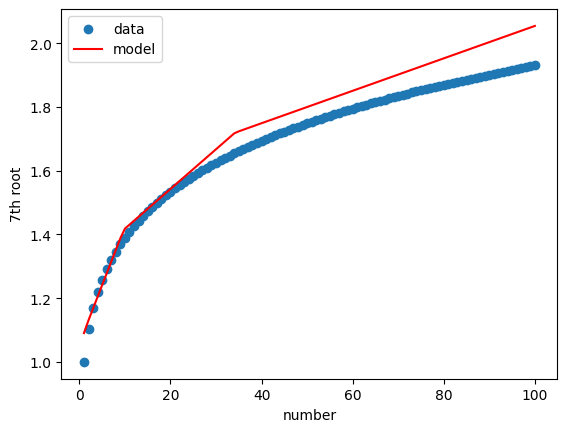

In [5]:
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np


#Load dataset
#split into input (X) and output (y)
X = np.arange(1,101)
y = np.power(X, 1/7)


#define keras model
model = Sequential()

model.add(Dense(6,input_dim=1,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)



#fit the keras model on the dataset (CPU)
model.fit(X,y,epochs=2000,batch_size=10, verbose=0)
model.summary()

#make class predictions with the model
predictions = model.predict(X)

#summarize the first 10 cases
for i in range(len(X)):
    print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )

import matplotlib.pyplot as plt
number_grid = np.linspace(1, 100, 100)
plt.scatter(X,y, label='data')
plt.plot(number_grid,model.predict(np.expand_dims(number_grid,axis=1)) , color='red', label='model')
plt.xlabel('number')
plt.ylabel('7th root')
plt.legend()